In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install open_clip_torch matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image
import open_clip
import os

#importing the CLIP model
print('Loading CLIP Model...')
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')

#encoding the images
os.chdir(r'/content/drive/MyDrive/MajorProject/main_images')
image_names = []
file_list = os.listdir()
for file_name in file_list:
    image_path = '/content/drive/MyDrive/MajorProject/main_images/{}'.format(file_name)
    image_names.append(image_path)

print("Images:", len(image_names))
encoded_image = model.encode([Image.open(filepath) for filepath in image_names], batch_size=64, convert_to_tensor=True, show_progress_bar=True)

#highest cosine similarity score
processed_images = util.paraphrase_mining_embeddings(encoded_image)
#NUM_SIMILAR_IMAGES = 10

print('Finding near duplicate images...')
# Use a threshold parameter to identify two images as similar. By setting the threshold lower,
# you will get larger clusters which have less similar images in it. Threshold 0 - 1.00
# A threshold of 1.00 means the two images are exactly the same. Since we are finding near
# duplicate images, we can set it at 0.99 or any number 0 < X < 1.00.
threshold = 0.80
near_duplicates = [image for image in processed_images if image[0] > threshold]

for score, image_id1, image_id2 in near_duplicates:
    print("\nScore: {:.3f}%".format(score * 100))
    print(image_names[image_id1])
    print(image_names[image_id2])

Loading CLIP Model...
Images: 151


AttributeError: ignored

In [ ]:
from PIL import Image
from sentence_transformers import util
import open_clip
import torch
import numpy as np
import glob
import os

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')

original_images = []
images = []
texts = []


for filename in [filename for filename in os.listdir('/content/drive/MyDrive/MajorProject/main_images') if filename.endswith(".png") or filename.endswith(".jpg")]:


    image = Image.open(os.path.join('/content/drive/MyDrive/MajorProject/main_images', filename)).convert("RGB")
    original_images.append(image)
    images.append(preprocess(image))

image_input = torch.tensor(np.stack(images))

encoded_image = model.encode_image(image_input).float()
processed_images = util.paraphrase_mining_embeddings(encoded_image)

threshold = 0.80

near_duplicates = [image for image in processed_images if image[0] > threshold]

for score, img1, img2 in near_duplicates:
    print("\nScore: {:.3f}%".format(score * 100))
    print(img1)
    print(img2)


Score: 92.169%
148
15

Score: 92.007%
68
78

Score: 91.742%
74
111

Score: 91.732%
124
148

Score: 91.654%
55
148

Score: 91.020%
124
133

Score: 90.951%
22
73

Score: 90.447%
15
55

Score: 90.392%
140
143

Score: 89.693%
15
124

Score: 89.642%
111
134

Score: 89.618%
12
136

Score: 89.265%
15
101

Score: 89.232%
108
137

Score: 89.224%
126
148

Score: 88.912%
86
110

Score: 88.907%
75
108

Score: 88.874%
75
110

Score: 88.758%
55
126

Score: 88.691%
133
148

Score: 88.667%
55
124

Score: 88.498%
69
74

Score: 88.483%
82
101

Score: 88.470%
67
75

Score: 88.320%
37
112

Score: 88.253%
74
134

Score: 88.164%
32
74

Score: 88.105%
11
110

Score: 88.029%
75
111

Score: 87.945%
101
148

Score: 87.936%
3
64

Score: 87.883%
26
136

Score: 87.686%
22
78

Score: 87.579%
93
137

Score: 87.449%
75
137

Score: 87.409%
18
59

Score: 87.362%
101
133

Score: 87.353%
78
110

Score: 87.344%
75
93

Score: 87.242%
78
108

Score: 87.190%
15
133

Score: 87.164%
18
37

Score: 87.161%
11
75

Score: 87.080%

In [ ]:
near_duplicates

[[0.9216902852058411, 148, 15],
 [0.9200683832168579, 68, 78],
 [0.9174178838729858, 74, 111],
 [0.9173194169998169, 124, 148],
 [0.9165439605712891, 55, 148],
 [0.9102038145065308, 124, 133],
 [0.9095075130462646, 22, 73],
 [0.9044652581214905, 15, 55],
 [0.9039154648780823, 140, 143],
 [0.8969278335571289, 15, 124],
 [0.8964228630065918, 111, 134],
 [0.8961820602416992, 12, 136],
 [0.8926458954811096, 15, 101],
 [0.8923169374465942, 108, 137],
 [0.892240047454834, 126, 148],
 [0.8891182541847229, 86, 110],
 [0.8890699744224548, 75, 108],
 [0.8887397050857544, 75, 110],
 [0.8875791430473328, 55, 126],
 [0.8869056701660156, 133, 148],
 [0.8866726756095886, 55, 124],
 [0.8849816918373108, 69, 74],
 [0.8848250508308411, 82, 101],
 [0.8847038745880127, 67, 75],
 [0.8831984996795654, 37, 112],
 [0.8825334310531616, 74, 134],
 [0.8816414475440979, 32, 74],
 [0.8810468912124634, 11, 110],
 [0.8802900314331055, 75, 111],
 [0.8794469237327576, 101, 148],
 [0.8793615102767944, 3, 64],
 [0.87882

In [ ]:
clusters = [[]]
fl = 0
for score, id1, id2 in near_duplicates:
    fl = 0
    for sim_image in clusters:
        if image_names[id1] in sim_image and image_names[id2] not in sim_image:
            sim_image.append(image_names[id2])
            fl = 1
            break
        elif image_names[id2] in sim_image and image_names[id1] not in sim_image:
            sim_image.append(id1)
            fl = 1
            break
        elif image_names[id1] in sim_image and image_names[id2] in sim_image:
            fl = 1
            break
    if fl == 0:
        sim_images = []
        sim_images.append(image_names[id1])
        sim_images.append(image_names[id2])
        clusters.append(sim_images)
clusters

[[],
 ['/content/drive/MyDrive/MajorProject/main_images/788.jpg',
  '/content/drive/MyDrive/MajorProject/main_images/749.jpg',
  124,
  55,
  '/content/drive/MyDrive/MajorProject/main_images/730.jpg',
  '/content/drive/MyDrive/MajorProject/main_images/769.jpg',
  '/content/drive/MyDrive/MajorProject/main_images/701.jpg',
  126,
  '/content/drive/MyDrive/MajorProject/main_images/719.jpg',
  133,
  82,
  '/content/drive/MyDrive/MajorProject/main_images/743.jpg',
  82,
  '/content/drive/MyDrive/MajorProject/main_images/739.jpg',
  '/content/drive/MyDrive/MajorProject/main_images/796.jpg',
  '/content/drive/MyDrive/MajorProject/main_images/805.jpg',
  114,
  114,
  '/content/drive/MyDrive/MajorProject/main_images/817.jpg',
  6],
 ['/content/drive/MyDrive/MajorProject/main_images/742.jpg',
  '/content/drive/MyDrive/MajorProject/main_images/746.jpg',
  22,
  '/content/drive/MyDrive/MajorProject/main_images/781.jpg',
  '/content/drive/MyDrive/MajorProject/main_images/696.jpg',
  93,
  67,
  6

In [ ]:
fl = 0
unsim_images = []
for image in image_names:
    fl = 0
    for cluster in clusters:
        if image in cluster:
            fl = 1
            break
    if fl == 0:
        unsim_images.append(image)
unsim_images

['/content/drive/MyDrive/MajorProject/main_images/723.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/830.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/824.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/715.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/787.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/708.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/731.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/782.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/756.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/737.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/840.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/729.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/833.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/795.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/838.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/841.jpg',
 '/content/drive/MyDrive/MajorProject/ma

In [ ]:
import os
index = 1
for cluster in clusters:
    src = '/content/drive/MyDrive/MajorProject/main_images'
    dst = "/content/drive/MyDrive/MajorProject/clusters/{}".format(index)
    print('mkdir "{}"'.format(dst))
    os.system('mkdir "{}"'.format(dst))

    for image in cluster:
        try:
            imName = image.split('/')[-1]
            open(dst + '/{}'.format(imName), 'wb').write(open(image, 'rb').read())
        except:
            pass
    index += 1

print("Photos Downloaded! Hurray!")

mkdir "/content/drive/MyDrive/MajorProject/clusters/1"
mkdir "/content/drive/MyDrive/MajorProject/clusters/2"
mkdir "/content/drive/MyDrive/MajorProject/clusters/3"
mkdir "/content/drive/MyDrive/MajorProject/clusters/4"
mkdir "/content/drive/MyDrive/MajorProject/clusters/5"
mkdir "/content/drive/MyDrive/MajorProject/clusters/6"
mkdir "/content/drive/MyDrive/MajorProject/clusters/7"
mkdir "/content/drive/MyDrive/MajorProject/clusters/8"
mkdir "/content/drive/MyDrive/MajorProject/clusters/9"
mkdir "/content/drive/MyDrive/MajorProject/clusters/10"
mkdir "/content/drive/MyDrive/MajorProject/clusters/11"
mkdir "/content/drive/MyDrive/MajorProject/clusters/12"
mkdir "/content/drive/MyDrive/MajorProject/clusters/13"
mkdir "/content/drive/MyDrive/MajorProject/clusters/14"
mkdir "/content/drive/MyDrive/MajorProject/clusters/15"
mkdir "/content/drive/MyDrive/MajorProject/clusters/16"
mkdir "/content/drive/MyDrive/MajorProject/clusters/17"
mkdir "/content/drive/MyDrive/MajorProject/clusters/18"
m

In [ ]:
for cluster in clusters[1:]:
  unsim_images.append(cluster[0])

In [ ]:
unsim_images

['/content/drive/MyDrive/MajorProject/main_images/723.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/830.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/824.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/715.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/787.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/708.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/731.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/782.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/756.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/737.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/840.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/729.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/833.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/795.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/838.jpg',
 '/content/drive/MyDrive/MajorProject/main_images/841.jpg',
 '/content/drive/MyDrive/MajorProject/ma

In [ ]:
src = '/content/drive/MyDrive/MajorProject/main_images'
dst = "/content/drive/MyDrive/MajorProject/unsim_images"
print('mkdir "{}"'.format(dst))
os.system('mkdir "{}"'.format(dst))

for image in unsim_images:
    try:
        imName = image.split('/')[-1]
        open(dst + '/{}'.format(imName), 'wb').write(open(image, 'rb').read())
    except:
        pass

print("Photos Downloaded! Hurray!")

mkdir "/content/drive/MyDrive/MajorProject/unsim_images"
Photos Downloaded! Hurray!


In [ ]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

In [ ]:
from PIL import Image
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")
    print("I_Image: ", i_image)

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds


In [ ]:
import os
image_names = []
folder_dir = "/content/drive/MyDrive/MajorProject/unsim_images/"
for file in os.listdir(folder_dir):
    if (file.endswith(".png") or file.endswith(".jpg") or file.endswith(".jpeg")):
        image_names.append(folder_dir+file)

preds = predict_step(image_names)

I_Image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1067 at 0x7F5FA432A770>
I_Image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1200 at 0x7F5FA432B070>
I_Image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1200 at 0x7F5FA432AF20>
I_Image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1200 at 0x7F5FA432ACE0>
I_Image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1599x1200 at 0x7F5FA432AE90>
I_Image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1201 at 0x7F5FA432B130>
I_Image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=725x420 at 0x7F5FA432B3A0>
I_Image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x900 at 0x7F5FA432B8E0>
I_Image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x683 at 0x7F5FA432BEB0>
I_Image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x1600 at 0x7F5FA432AA40>
I_Image:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size

In [ ]:
preds

['a bowl of food on a wooden table',
 'a sign that is on the side of a building',
 'a table topped with plates of food and drinks',
 'a plate of food on a table',
 'two plates of food on a table',
 'a building with a sign on the side of it',
 'a city street filled with lots of colorful lights',
 'a building with graffiti on the side of it',
 'a woman standing in a kitchen preparing food',
 'a row of green plants in front of a building',
 'a sign on a building with a neon sign on it',
 'a garden area with a table and a fruit stand',
 'people sitting at tables in a restaurant',
 'a pile of food on a wooden table',
 'a neon sign on the side of a building',
 'people sitting around a table',
 'a double decker bus parked in front of a building',
 'a basket filled with lots of food on top of a table',
 'a plate of food on a table',
 'a person sitting at a table with a glass of beer',
 'a plate of food on a table',
 'a dark room with a clock on the wall',
 'a restaurant sign on the side of a b

In [ ]:
len(preds)

86

In [ ]:
import os
from os import listdir
from IPython.display import Image

# get the path or directory
folder_dir = "/content/drive/MyDrive/MajorProject/unsim_images"
captions = dict()
i=0
for file in os.listdir(folder_dir):
    # check if the image ends with png or jpg or jpeg
    if (file.endswith(".png") or file.endswith(".jpg")\
        or file.endswith(".jpeg")):
        image = folder_dir + '/' + file
        # display
        output = preds[i]
        i=i+1
        captions[image] = output
captions

{'/content/drive/MyDrive/MajorProject/unsim_images/723.jpg': 'a bowl of food on a wooden table',
 '/content/drive/MyDrive/MajorProject/unsim_images/830.jpg': 'a sign that is on the side of a building',
 '/content/drive/MyDrive/MajorProject/unsim_images/824.jpg': 'a table topped with plates of food and drinks',
 '/content/drive/MyDrive/MajorProject/unsim_images/715.jpg': 'a plate of food on a table',
 '/content/drive/MyDrive/MajorProject/unsim_images/787.jpg': 'two plates of food on a table',
 '/content/drive/MyDrive/MajorProject/unsim_images/708.jpg': 'a building with a sign on the side of it',
 '/content/drive/MyDrive/MajorProject/unsim_images/731.jpg': 'a city street filled with lots of colorful lights',
 '/content/drive/MyDrive/MajorProject/unsim_images/782.jpg': 'a building with graffiti on the side of it',
 '/content/drive/MyDrive/MajorProject/unsim_images/756.jpg': 'a woman standing in a kitchen preparing food',
 '/content/drive/MyDrive/MajorProject/unsim_images/737.jpg': 'a row 

In [ ]:
caption_features = ['large building', 'trees', 'food', 'monument', 'restaurant', 'bar', 'bedroom', 'river', 'pool', 'pond', 'lake', 'bridge', 'temple', 'hotel','hill',
                    'ocean', 'sea', 'city', 'village', 'rural', 'urban', 'sign', 'plants', 'statue', 'mountain', 'stores']
count = 20
final_images = dict()
while(count > 0):
    for caption_feature in caption_features:
        if count==0:
          break
        for image, caption in captions.items():
            #print(image)
            if caption_feature in caption:
                count = count-1
                final_images[image] = caption
                print(final_images[image])
                print('Count: ', count)
                del captions[image]
                break

final_images


a bowl of food on a wooden table
Count:  19
people sitting at tables in a restaurant
Count:  18
a bar that has a lot of bottles on it
Count:  17
a city street filled with lots of colorful lights
Count:  16
a sign that is on the side of a building
Count:  15
a row of green plants in front of a building
Count:  14
a table topped with plates of food and drinks
Count:  13
a restaurant sign on the side of a building
Count:  12
a bar with a lot of people drinking and eating
Count:  11
a city street filled with lots of colorful umbrellas
Count:  10
a building with a sign on the side of it
Count:  9
a row of tall green plants in a parking lot
Count:  8
a plate of food on a table
Count:  7
a neon sign hanging from the ceiling of a restaurant
Count:  6
a bar with a lot of drinks on it
Count:  5
a city street at night with a train on the tracks
Count:  4
a sign on a building with a neon sign on it
Count:  3
two plates of food on a table
Count:  2
people sitting at tables in a restaurant
Count:  1

{'/content/drive/MyDrive/MajorProject/unsim_images/723.jpg': 'a bowl of food on a wooden table',
 '/content/drive/MyDrive/MajorProject/unsim_images/833.jpg': 'people sitting at tables in a restaurant',
 '/content/drive/MyDrive/MajorProject/unsim_images/702.jpg': 'a bar that has a lot of bottles on it',
 '/content/drive/MyDrive/MajorProject/unsim_images/731.jpg': 'a city street filled with lots of colorful lights',
 '/content/drive/MyDrive/MajorProject/unsim_images/830.jpg': 'a sign that is on the side of a building',
 '/content/drive/MyDrive/MajorProject/unsim_images/737.jpg': 'a row of green plants in front of a building',
 '/content/drive/MyDrive/MajorProject/unsim_images/824.jpg': 'a table topped with plates of food and drinks',
 '/content/drive/MyDrive/MajorProject/unsim_images/813.jpg': 'a restaurant sign on the side of a building',
 '/content/drive/MyDrive/MajorProject/unsim_images/772.jpg': 'a bar with a lot of people drinking and eating',
 '/content/drive/MyDrive/MajorProject/u

In [ ]:
len(final_images)

20

In [ ]:
src = '/content/drive/MyDrive/MajorProject/unsim_images'
dst = "/content/drive/MyDrive/MajorProject/final_images"
print('mkdir "{}"'.format(dst))
os.system('mkdir "{}"'.format(dst))

for image in final_images:
    try:
        imName = image.split('/')[-1]
        open(dst + '/{}'.format(imName), 'wb').write(open(image, 'rb').read())
    except:
        pass

print("Photos Downloaded! Hurray!")

mkdir "/content/drive/MyDrive/MajorProject/final_images"
Photos Downloaded! Hurray!


In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Final Collage:-


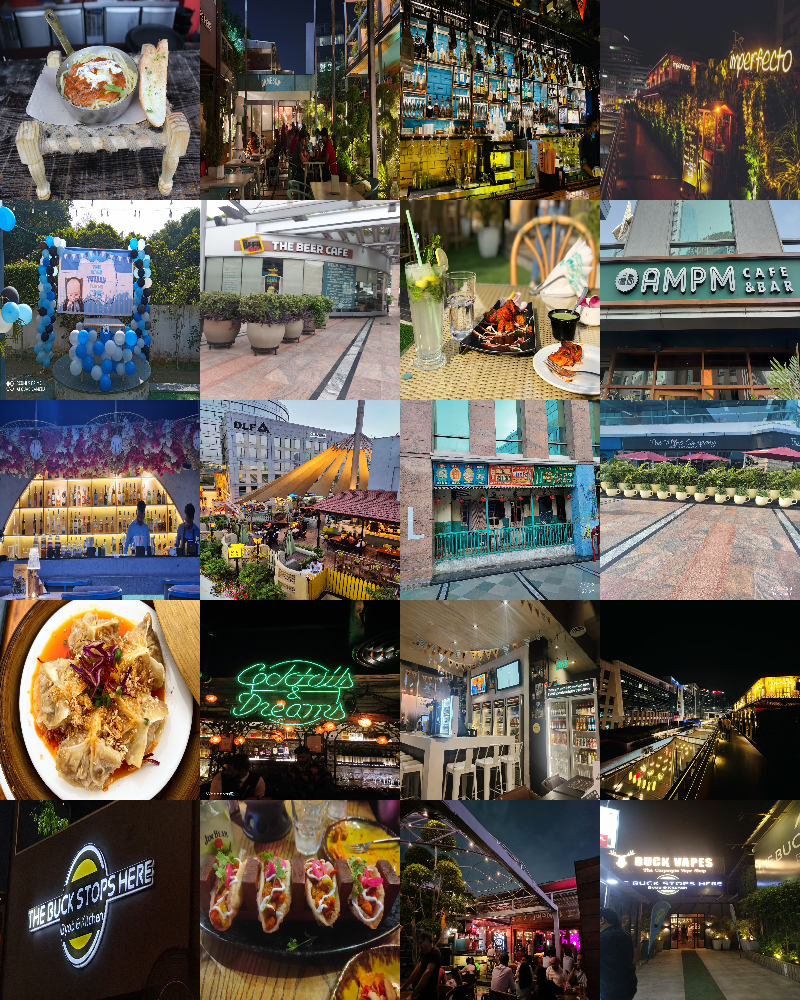

In [ ]:
# importing the modules
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

folder = "/content/drive/MyDrive/MajorProject/final_images"
horizontal=[]
vertical=[]
i=0
for file in os.listdir(folder):

  img = folder_dir + '/' + file
  image=cv2.imread(img)
  image= cv2.resize(image,(200,200))
  horizontal.append(image)
  i=i+1
  if i%4 == 0:
    horizontal_stack=np.hstack(horizontal)
    vertical.append(horizontal_stack)
    horizontal = []

Vertical_attachment=np.vstack(vertical)


# read all the images


# make all the images of same size
#so we will use resize function

# Now how we will attach image with other image
# we will create a horizontal stack of images
# then we will add it to the vertical stack
# let the horizontal pair be (image1,image2)
# and (image3,image4)
# we will use numpy stack function
# Horizontal1=np.hstack([image1,image2])
# Horizontal2=np.hstack([image3,image4])

# Now the horizontal attachment is done
# noe vertical attachment


# Show the final attachment
print("Final Collage:-")
cv2_imshow(Vertical_attachment)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
from transformers import pipeline
import os
from os import listdir
from IPython.display import Image

caption = pipeline('image-to-text')
caption_features = ['large building', 'trees', 'food', 'monument', 'restaurant', 'bar', 'bedroom', 'river', 'pool', 'pond', 'lake', 'bridge', 'temple', 'hotel','hill',
                    'ocean', 'sea', 'city', 'village', 'rural', 'urban', 'sign', 'plants', 'statue', 'mountain', 'stores']
count = 20
final_images = dict()
visited=[]

# get the path or directory

folder_dir = "/content/drive/MyDrive/MajorProject/unsim_images"

#captions = dict()

for file in os.listdir(folder_dir):
  #print(len(caption_features))
  if count == 0:
        break
  if len(caption_features)==15:
    caption_features=visited.copy()
    print(caption_features)

    # check if the image ends with png or jpg or jpeg
  if (file.endswith(".png") or file.endswith(".jpg")
      or file.endswith(".jpeg")):
      image = folder_dir + '/' + file
      output = caption(image)
      print(output)
      for caption_feature in caption_features:
        if caption_feature in (str(output)[21:-4]):
          visited.append(caption_feature)
          caption_features.remove(caption_feature)
          final_images[image] = (str(output)[21:-4])
          count = count-1
          print(count)
          break

final_images

No model was supplied, defaulted to ydshieh/vit-gpt2-coco-en and revision 65636df (https://huggingface.co/ydshieh/vit-gpt2-coco-en).
Using a pipeline without specifying a model name and revision in production is not recommended.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


26
[{'generated_text': 'a yellow bus driving down a street next to a tall building '}]
26
[{'generated_text': 'a building with a clock on the front of it '}]
26
[{'generated_text': 'a city with a lot of buildings and a train on the tracks '}]
19
25
[{'generated_text': 'a man riding a bike down a street next to a fountain '}]
25
[{'generated_text': 'a large building with a clock tower '}]
18
24
[{'generated_text': 'a large white clock on a pole in the middle of a city '}]
24
[{'generated_text': 'a statue of a man in a field with a horse '}]
17
23
[{'generated_text': 'a large group of plants growing on a wooden fence '}]
16
22
[{'generated_text': 'a street with a lighted street light and a traffic light '}]
22
[{'generated_text': 'a bedroom with a bed, desk, and a lamp '}]
15
21
[{'generated_text': 'a large pool of water with a balcony '}]
14
20
[{'generated_text': 'a bathroom with a sink, shower, and a toilet '}]
20
[{'generated_text': 'a large building with a large building behind it '

{'/content/drive/MyDrive/MajorProject/unsim_images/3.png': 'a city with a lot of buildings and a train on the tracks',
 '/content/drive/MyDrive/MajorProject/unsim_images/5.png': 'a large building with a clock tower',
 '/content/drive/MyDrive/MajorProject/unsim_images/8.png': 'a statue of a man in a field with a horse',
 '/content/drive/MyDrive/MajorProject/unsim_images/9.png': 'a large group of plants growing on a wooden fence',
 '/content/drive/MyDrive/MajorProject/unsim_images/12.png': 'a bedroom with a bed, desk, and a lamp',
 '/content/drive/MyDrive/MajorProject/unsim_images/13.png': 'a large pool of water with a balcony',
 '/content/drive/MyDrive/MajorProject/unsim_images/22.png': 'a plate of food with rice, meat, and vegetables',
 '/content/drive/MyDrive/MajorProject/unsim_images/38.png': 'a sign that says "no parking" on a street',
 '/content/drive/MyDrive/MajorProject/unsim_images/124.png': 'people walking down a street with a few stores',
 '/content/drive/MyDrive/MajorProject/

In [ ]:
len(final_images)

15